In [64]:
import pickle
import numpy as np

import sys
from GSP_helper import cleanup, runGsp
from matplotlib import pyplot as plt

from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [65]:
print(sys.version)

3.9.7 (tags/v3.9.7:1016ef3, Aug 30 2021, 20:19:38) [MSC v.1929 64 bit (AMD64)]


In [66]:
inputs_list = ["N1", "P0", "T0", "Mach", "HP"]
output_list = ["TT25", "TT3", "Ps3", "TT49", "Wf", "N2", "Re2", "Re25", "Re3", "Re4", "Re49", "Re5", "Re14", "Re19"]

In [67]:
GEnx_OD, GEnx_OD_true, N1cCEOD = pickle.load(open("CEOD_input.p", "rb"))
_, All_Reynolds = pickle.load(open("Constants/Reynolds_set_Valid.p", "rb"))

In [68]:
All_Reynolds_flatten = np.array([item for sublist in All_Reynolds for item in sublist])
GEnx_OD_flatten = np.array([item for sublist in GEnx_OD for item in sublist])
GEnx_OD_true_flatten = np.array([item for sublist in GEnx_OD_true for item in sublist])

Re2, Re25, Re3, Re4, Re49, Re5, Re14, Re19 = All_Reynolds_flatten.T

In [74]:
def create_clusters(dataset):
    k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
    k_means.fit(dataset)
    k_means_cluster_centers = k_means.cluster_centers_
    
    print(k_means_cluster_centers)
    
    return k_means_cluster_centers

Re_25_clusters = create_clusters(np.vstack((Re25, GEnx_OD_flatten[:, 0])).T)

[[6.38793772e+06 9.79348417e+01]
 [1.74735706e+07 9.57508022e+01]
 [1.05933894e+07 1.04727426e+02]]


(309,) (309,)


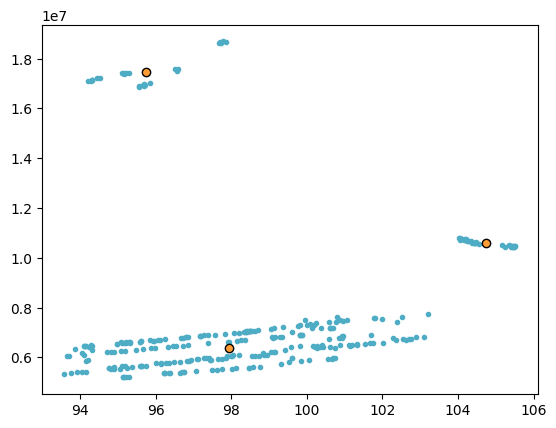

In [78]:
print(GEnx_OD_flatten[:, 0].shape, Re25.shape)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']
plt.scatter(GEnx_OD_flatten[:, 0], Re25, color=colors[0], marker='.')
plt.plot(Re_25_clusters.T[1], Re_25_clusters.T[0], 'o', markerfacecolor=colors[1],
                 markeredgecolor='k', markersize=6)
plt.show()

In [71]:
# def create_clustersss():
#     k_means = KMeans(init='k-means++', n_clusters=3, n_init=10)
#     k_means.fit(Re25)
#     k_means_labels = k_means.labels_
#     k_means_cluster_centers = k_means.cluster_centers_
#     k_means_labels_unique = np.unique(k_means_labels)

#     colors = ['#4EACC5', '#FF9C34', '#4E9A06']
#     plt.figure()
#     print(k_means_cluster_centers)

# #     for k, col in zip(range(3), colors):
# #         my_members = k_means_labels == k
# #         cluster_center = k_means_cluster_centers[k]
# #         # plt.plot(Re25[my_members, 0], Re25[my_members, 1], 'w',
# #         #          markerfacecolor=col, marker='.')
# #         plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
# #                  markeredgecolor='k', markersize=6)
# #     plt.title('KMeans')
#     plt.grid()
#     plt.show()
# create_clusters()